# Lab 8.3.4 Boosting

In [23]:
import pandas as pd
import numpy as np

from sklearn.datasets import load_boston
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.ensemble import AdaBoostRegressor
from xgboost import XGBRegressor

import matplotlib.pyplot as plt

In [3]:
# loading the dataset
boston_data = load_boston()
boston = pd.DataFrame(boston_data.data,columns = boston_data['feature_names'])
boston['MEDV'] = boston_data['target']
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


## In this notebook i am also going to compare the two boosting techniques - Adaboosting vs XGB Boosting

to know more about the difference between the two - https://datascience.stackexchange.com/questions/39193/adaboost-vs-gradient-boosting

In [11]:
# splitting the data into train and test
X = boston.drop('MEDV',axis = 1)
y = boston['MEDV']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.5,random_state = 1)
print(X_train.shape,X_test.shape)

(253, 13) (253, 13)


## Adaboost

In [9]:
base_reg = DecisionTreeRegressor(max_depth = 4)
reg = AdaBoostRegressor(base_reg,n_estimators=5000)
reg.fit(X_train,y_train)
print('Training score ',reg.score(X_train,y_train))
print('Test score ',reg.score(X_test,y_test))

Training score  0.9602475897306324
Test score  0.8585549637358928


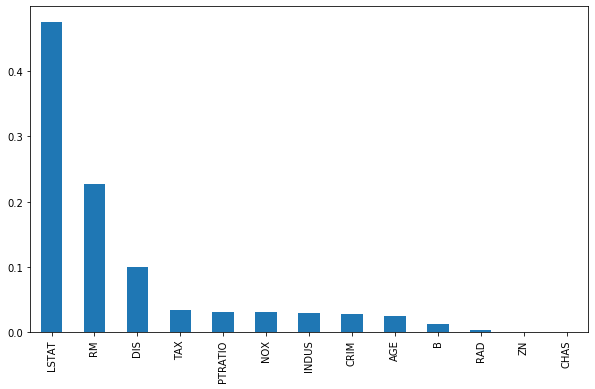

In [21]:
# feature importance
pd.Series(reg.feature_importances_,index = X_train.columns).sort_values(ascending=False).plot.bar(figsize = (10,6))

# XGB Classifier 


In [24]:
xgb = XGBRegressor()
xgb.fit(X_train,y_train)
print('Training score is ',xgb.score(X_train,y_train))
print('Test score is ',xgb.score(X_test,y_test))

C:\Users\Lenovo\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[09:40:42] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Training score is  0.9826216624003152
Test score is  0.8880422216668562


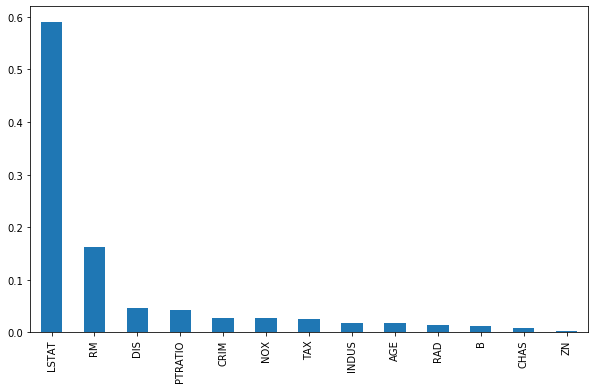

In [25]:
# feature importance
pd.Series(xgb.feature_importances_,index = X_train.columns).sort_values(ascending=False).plot.bar(figsize = (10,6))

XGB performs the best,